In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from ml_libs.resample import split_stratified_train_test
from ml_libs import metrics
from ml_libs import transform
from importlib import reload

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [2]:
reload(metrics)
reload(transform)

<module 'ml_libs.transform' from '/home/michel/Documentos/Machine-Learning/Lista 6/ml_libs/transform.py'>

#### Carregando dataset

In [3]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','renda >50k']
df = pd.read_csv('adult.data', names= cols, na_values='?', sep=',\s+', engine='python');

#### Descricao 

### Features
**age:** continuous. 
<br/>
**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br/>
**fnlwgt:** continuous.
<br/>
**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
<br/>
**education-num:** continuous.
<br/>
**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
<br/>
**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
<br/>
**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
<br/>
**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
<br/>
**sex:** Female, Male.
<br/>
**capital-gain:** continuous.
<br/>
**capital-loss:** continuous.
<br/>
**hours-per-week:** continuous.
<br/>
**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Analisando os dados

In [252]:
df.head(30)

age         workclass  fnlwgt     education  education-num  \
0    39         State-gov   77516     Bachelors             13   
1    50  Self-emp-not-inc   83311     Bachelors             13   
2    38           Private  215646       HS-grad              9   
3    53           Private  234721          11th              7   
4    28           Private  338409     Bachelors             13   
5    37           Private  284582       Masters             14   
6    49           Private  160187           9th              5   
7    52  Self-emp-not-inc  209642       HS-grad              9   
8    31           Private   45781       Masters             14   
9    42           Private  159449     Bachelors             13   
10   37           Private  280464  Some-college             10   
11   30         State-gov  141297     Bachelors             13   
12   23           Private  122272     Bachelors             13   
13   32           Private  205019    Assoc-acdm             12   
14   40           Private  121772     Assoc-voc             11   
15   34           Private  245487       7th-8th              4   
16   25  Self-emp-not-inc  176756       HS-grad              9   
17   32           Private  186824       HS-grad              9   
18   38           Private   28887          11th              7   
19   43  Self-emp-not-inc  292175       Masters             14   
20   40           Private  193524     Doctorate             16   
21   54           Private  302146       HS-grad              9   
22   35       Federal-gov   76845           9th              5   
23   43           Private  117037          11th              7   
24   59           Private  109015       HS-grad              9   
25   56         Local-gov  216851     Bachelors             13   
26   19           Private  168294       HS-grad              9   
27   54               NaN  180211  Some-college             10   
28   39           Private  367260       HS-grad              9   
29   49           Private  193366       HS-grad              9   

           marital-status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
5      Married-civ-spouse    Exec-managerial           Wife   
6   Married-spouse-absent      Other-service  Not-in-family   
7      Married-civ-spouse    Exec-managerial        Husband   
8           Never-married     Prof-specialty  Not-in-family   
9      Married-civ-spouse    Exec-managerial        Husband   
10     Married-civ-spouse    Exec-managerial        Husband   
11     Married-civ-spouse     Prof-specialty        Husband   
12          Never-married       Adm-clerical      Own-child   
13          Never-married              Sales  Not-in-family   
14     Married-civ-spouse       Craft-repair        Husband   
15     Married-civ-spouse   Transport-moving        Husband   
16          Never-married    Farming-fishing      Own-child   
17          Never-married  Machine-op-inspct      Unmarried   
18     Married-civ-spouse              Sales        Husband   
19               Divorced    Exec-managerial      Unmarried   
20     Married-civ-spouse     Prof-specialty        Husband   
21              Separated      Other-service      Unmarried   
22     Married-civ-spouse    Farming-fishing        Husband   
23     Married-civ-spouse   Transport-moving        Husband   
24               Divorced       Tech-support      Unmarried   
25     Married-civ-spouse       Tech-support        Husband   
26          Never-married       Craft-repair      Own-child   
27     Married-civ-spouse                NaN        Husband   
28               Divorced    Exec-managerial  Not-in-family   
29     Married-civ-spouse       Craft-repair        Husband   

   

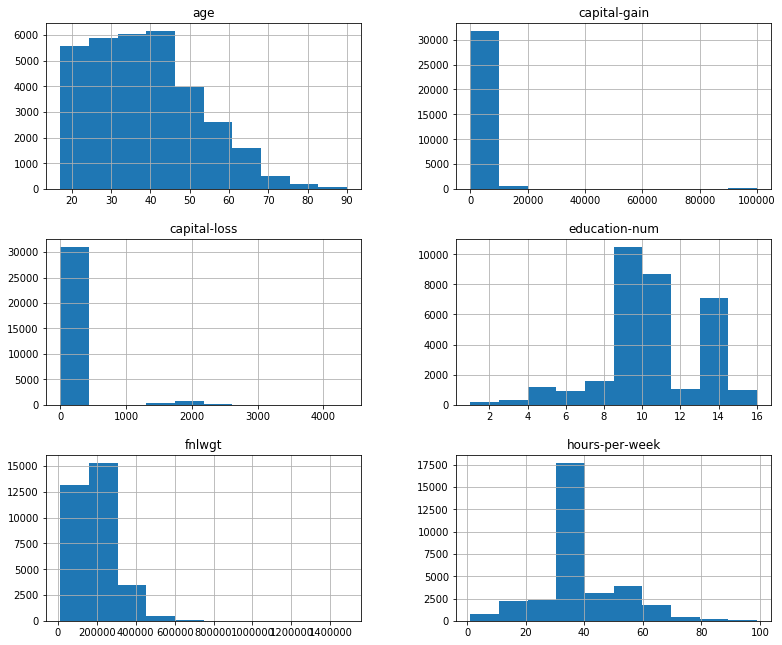

In [253]:
df.hist(bins=10,figsize=(13,11));

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
renda >50k        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [255]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [256]:
df.corr().style.background_gradient(cmap='coolwarm')

# Pre-Processamento

inserindo o valor mais frequente nas features faltantes 

In [4]:
for column in ['workclass', 'occupation', 'native-country']:
    df[column] = df[column].replace(np.nan, df[column].mode()[0])

In [258]:
df.head(30)

age         workclass  fnlwgt     education  education-num  \
0    39         State-gov   77516     Bachelors             13   
1    50  Self-emp-not-inc   83311     Bachelors             13   
2    38           Private  215646       HS-grad              9   
3    53           Private  234721          11th              7   
4    28           Private  338409     Bachelors             13   
5    37           Private  284582       Masters             14   
6    49           Private  160187           9th              5   
7    52  Self-emp-not-inc  209642       HS-grad              9   
8    31           Private   45781       Masters             14   
9    42           Private  159449     Bachelors             13   
10   37           Private  280464  Some-college             10   
11   30         State-gov  141297     Bachelors             13   
12   23           Private  122272     Bachelors             13   
13   32           Private  205019    Assoc-acdm             12   
14   40           Private  121772     Assoc-voc             11   
15   34           Private  245487       7th-8th              4   
16   25  Self-emp-not-inc  176756       HS-grad              9   
17   32           Private  186824       HS-grad              9   
18   38           Private   28887          11th              7   
19   43  Self-emp-not-inc  292175       Masters             14   
20   40           Private  193524     Doctorate             16   
21   54           Private  302146       HS-grad              9   
22   35       Federal-gov   76845           9th              5   
23   43           Private  117037          11th              7   
24   59           Private  109015       HS-grad              9   
25   56         Local-gov  216851     Bachelors             13   
26   19           Private  168294       HS-grad              9   
27   54           Private  180211  Some-college             10   
28   39           Private  367260       HS-grad              9   
29   49           Private  193366       HS-grad              9   

           marital-status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
5      Married-civ-spouse    Exec-managerial           Wife   
6   Married-spouse-absent      Other-service  Not-in-family   
7      Married-civ-spouse    Exec-managerial        Husband   
8           Never-married     Prof-specialty  Not-in-family   
9      Married-civ-spouse    Exec-managerial        Husband   
10     Married-civ-spouse    Exec-managerial        Husband   
11     Married-civ-spouse     Prof-specialty        Husband   
12          Never-married       Adm-clerical      Own-child   
13          Never-married              Sales  Not-in-family   
14     Married-civ-spouse       Craft-repair        Husband   
15     Married-civ-spouse   Transport-moving        Husband   
16          Never-married    Farming-fishing      Own-child   
17          Never-married  Machine-op-inspct      Unmarried   
18     Married-civ-spouse              Sales        Husband   
19               Divorced    Exec-managerial      Unmarried   
20     Married-civ-spouse     Prof-specialty        Husband   
21              Separated      Other-service      Unmarried   
22     Married-civ-spouse    Farming-fishing        Husband   
23     Married-civ-spouse   Transport-moving        Husband   
24               Divorced       Tech-support      Unmarried   
25     Married-civ-spouse       Tech-support        Husband   
26          Never-married       Craft-repair      Own-child   
27     Married-civ-spouse     Prof-specialty        Husband   
28               Divorced    Exec-managerial  Not-in-family   
29     Married-civ-spouse       Craft-repair        Husband   

   

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
renda >50k        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [260]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

Deletando fetura 'education', featura 'education-num' representa os mesmos dados

In [5]:
df.drop(labels=['education'], axis=1, inplace=True)

## Alterando colunas categoricas

Selecionando colunas catagoricas

In [6]:
columns_cat  = df.select_dtypes(['object']).columns

#### alterando coluna renda >50k para binaria
Ganha menos de 50k = 0 | Ganha mais de 50k = 1

In [7]:
df['renda >50k'] = pd.get_dummies(df['renda >50k'], drop_first=True)

#### Alterando colunas categoricas para binarias

In [8]:
df = pd.get_dummies(df, columns=columns_cat, prefix=columns_cat, drop_first=True)

In [265]:
df.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  1   
3                    0                       0                  1   
4                    0                       0                  1   

   workclass_Self-emp-inc      ...       native-country_Puerto-Rico  \
0                       0      ...                                0   
1                       0      ...                                0   
2                       0      ...                                0   
3                       0      ...                                0   
4                       0      ...                                0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native-country_Yugoslavia  renda >50k_1  
0                          0             0  
1                          0             0  
2                          0             0  
3                          0             0  
4                          0             0  

[5 rows x 83 columns]

alterando nomeclatura da coluna referente a label

In [9]:
df = df.rename(columns={'renda >50k_1':'Label'})

# Separação

Separando X e Y (feature e label)

In [10]:
X = df.drop(['Label'], axis=1)
y = df[['Label']]

Selecioando treino e teste

In [11]:
perc_train = 0.7
seed = 20

idx_train, idx_test = split_stratified_train_test(y, perc_train, seed)

In [12]:
X_train = X.loc[idx_train]
X_test = X.loc[idx_test]

y_train = y.loc[idx_train]
y_test = y.loc[idx_test]

In [270]:
np.average(X_train),np.average(X_test),np.average(y_train),np.average(y_test)

(2330.912419088873,
 2327.047332106371,
 0.24248672838152063,
 0.23681785604586875)

# Modelos

In [278]:
# modelos = {}
# modelos['SGDClassifier'] = {'model': SGDClassifier(), 'predic': [], 'acuracy': 0}
# modelos['SVM'] = {'model': SVC(), 'predic': [], 'acuracy': 0}
# modelos['KNeighborsClassifer'] = {'model': KNeighborsClassifier(), 'predic': [], 'acuracy': 0}

# modelos_norm = {}
# modelos['SGDClassifier'] = {'model_norm': SGDClassifier(), 'predic': [], 'acuracy': 0}
# modelos['SVM'] = {'model_norm': SVC(), 'predic': [], 'acuracy': 0}
# modelos['KNeighborsClassifer'] = {'model_norm': KNeighborsClassifier(), 'predic': [], 'acuracy': 0}

# modelos_stand = {}
# modelos['SGDClassifier'] = {'model_stand': SGDClassifier(), 'predic': [], 'acuracy': 0}
# modelos['SVM'] = {'model_stand': SVC(), 'predic': [], 'acuracy': 0}
# modelos['KNeighborsClassifer'] = {'model_stand': KNeighborsClassifier(), 'predic': [], 'acuracy': 0}

# Normalizacao

Normalizando X_train

Normalizando X_test

In [13]:
transformer = transform.normalize()
transformer.fit(X_train)

X_train_normalized = transformer.transform(X_train)
X_test_normalized = transformer.transform(X_test)

In [28]:
adg = SGDClassifier()

In [29]:
adg.fit(X_train,y_train);
adg_pred = adg.predict(X_test);
acuracy = metrics.accuracy(y_test,adg_pred)
acuracy

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7976860857991195

In [282]:
# for key in modelos:
#     modelos[key]['model'].fit(X_train,y_train)
#     modelos[key]['predic'] = modelos[key]['model'].predict(X_test)
#     modelos[key]['acuracy'] = metrics.accuracy(y_test,modelos[key]['predic'])

In [17]:
svm = SVC()

In [22]:
svm.fit(X_train,y_train);

/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
svm_pred = svm.predict(X_test)

In [25]:
svm_acuracy = metrics.accuracy(y_test,svm_pred)

In [27]:
svm_acuracy

0.7612368178560459

In [14]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
knc_pred = knc.predict(X_test)
knc_acuracy = metrics.accuracy(y_test,knc_pred)

/home/michel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [15]:
knc_acuracy

0.7735230879492168

In [31]:
acuracy,svm_acuracy, knc_acuracy

(0.7976860857991195, 0.7612368178560459, 0.7735230879492168)

# Analise
Em geral, os algoritimos possuem uma acuracia parecidas com o **SGDClassifier** sobresaindo dos demais classificador
